In [40]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [5]:
df = pd.read_excel('datasets\Credit Card Data.xlsx')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,708082083,Existing Customer,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,708083283,Attrited Customer,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,708084558,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,708085458,Existing Customer,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,708086958,Existing Customer,49,F,2,Uneducated,Married,Unknown,Blue,41,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239


Identify the top 10% of customers with the highest credit limits and analyze their spending behavior over the last 12 months. What are their most common transaction card categories?

In [23]:
dfa = df.sort_values(by='Credit_Limit', ascending=False)[['CLIENTNUM','Card_Category','Months_Inactive_12_mon','Credit_Limit']].reset_index()
top_ten = int(dfa.shape[0]*.1)
dfa = dfa[0:top_ten]
dfa

,index,CLIENTNUM,Card_Category,Months_Inactive_12_mon,Credit_Limit
0,7644,778170633,Blue,2,34516.0
1,1797,711686658,Silver,2,34516.0
2,7963,779548008,Silver,2,34516.0
3,7011,758348808,Blue,3,34516.0
4,7009,758331483,Silver,2,34516.0
...,...,...,...,...,...
1007,634,709372608,Blue,1,23457.0
1008,8674,789298833,Blue,2,23453.0
1009,2241,712515558,Blue,2,23447.0
1010,8993,794579658,Blue,2,23424.0


<Axes: ylabel='Frequency'>

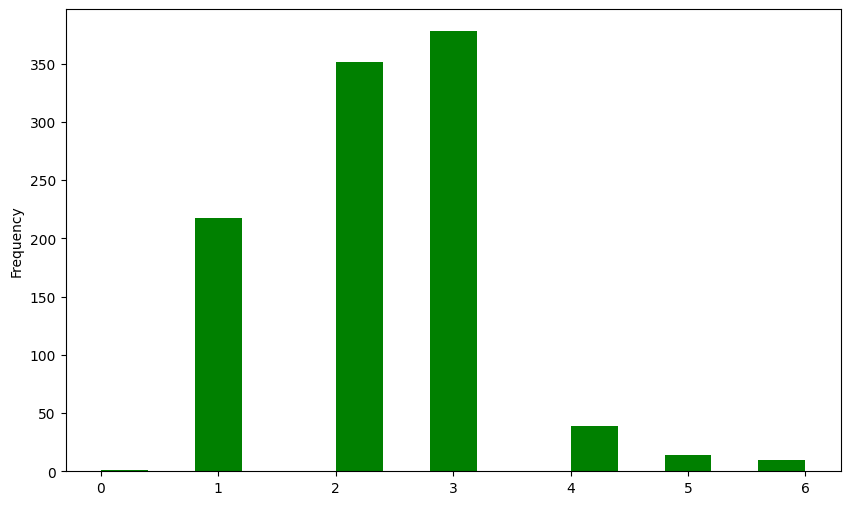

In [28]:
dfa['Months_Inactive_12_mon'].plot(kind='hist', bins=15, figsize=(10,6), color='green')

In [24]:
card = dfa['Card_Category'].mode()
card

0    Blue
Name: Card_Category, dtype: object

Calculate the average credit limit for each card category (Blue, Silver, Gold, Platinum) and compare it to the average transaction amount for each category. Are there any significant differences?

In [29]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,708082083,Existing Customer,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,708083283,Attrited Customer,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,708084558,Attrited Customer,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,708085458,Existing Customer,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,708086958,Existing Customer,49,F,2,Uneducated,Married,Unknown,Blue,41,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239


In [39]:
mrg1 = df.groupby('Card_Category')['Credit_Limit'].mean().reset_index()
mrg2 = df.groupby('Card_Category')['Total_Trans_Amt'].mean().reset_index()
dfb =pd.merge(mrg1,mrg2,on = 'Card_Category',how = 'inner')
dfb

,Card_Category,Credit_Limit,Total_Trans_Amt
0,Blue,7363.780002,4225.406740
1,Gold,28416.370690,7685.612069
2,Platinum,30283.450000,8999.750000
3,Silver,25277.836036,6590.482883


In [41]:
stat,p = st.ttest_ind(dfb.Credit_Limit,dfb.Total_Trans_Amt)

In [42]:
if p<=0.05:
    print("There's Significant Difference")
else:
    print("There's No Significant Difference")

There's Significant Difference


Analyze the relationship between customer age and credit limit. Is there a significant correlation between the two variables?

In [47]:
correlation_value = df['Customer_Age'].corr(df['Credit_Limit'])
if correlation_value<-0.5:
    print("Negative Correlation")
elif correlation_value>0.5:
    print("Positive Correlation")
else:
    print("No Correlation")

No Correlation


Create a pivot table that shows the average transaction amount for each income category and education level. Are there any significant differences in spending behavior between different income and education groups?